In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#https://giphy.com/gifs/life-programmer-ukMiDlCmdv2og

In [2]:
df = pd.read_csv('../GrindingData.csv')

In [3]:
df.head()

,Id,B,m,c,Vw,d,Ra,Fn,Pw,RaI,FnI,PwI
0,1,Resin,80,50,2.9,1.47,0.88,43.4,209,35.00,248,7.12
1,2,Resin,80,50,2.9,1.47,0.86,45.3,224,33.86,259,7.63
2,3,Resin,180,50,2.9,2.59,0.83,66.2,329,32.68,378,11.21
3,4,Resin,180,50,2.9,2.59,0.84,66.3,344,33.07,379,11.72
4,5,Resin,80,100,2.9,2.59,0.86,64.2,314,33.86,367,10.70


In [4]:
df['B'] = df['B'].map({'Resin':0,'Vitrified':1})

In [5]:
df = df.drop('Id',axis=1)
df.iloc[::2]

,B,m,c,Vw,d,Ra,Fn,Pw,RaI,FnI,PwI
0,0,80,50,2.9,1.47,0.88,43.4,209,35.00,248,7.12
2,0,180,50,2.9,2.59,0.83,66.2,329,32.68,378,11.21
4,0,80,100,2.9,2.59,0.86,64.2,314,33.86,367,10.70
6,0,180,100,2.9,1.47,0.67,55.5,224,26.38,317,7.63
8,0,80,50,6.9,2.59,0.91,95.6,599,35.83,546,20.40
10,0,180,50,6.9,1.47,0.85,74.9,374,33.46,428,12.74
12,0,80,100,6.9,1.47,0.89,68.6,329,35.04,392,11.21
14,0,180,100,6.9,2.59,0.71,109.6,658,27.95,626,22.41
16,1,80,50,2.9,2.59,0.87,36.8,150,34.25,210,5.11
18,1,180,50,2.9,1.47,0.57,30.5,108,22.44,174,3.68


In [6]:
#df.describe().transpose()
df.iloc[1::2].shape

(16, 11)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#df.drop([18,19,27],axis=0)
#plt.figure(figsize=(12,8))
#sns.boxplot(x='d',y='Ra',data = df)
#sns.distplot(df['Ra'])

In [9]:
# Convert Pandas to Numpy for Keras

# Features
X = df.drop(['RaI','Fn','Pw'],axis=1).values

# Label
y = df['RaI'].values

# Split

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train = df.drop(['Ra','Fn','Pw','RaI','FnI','PwI'],axis=1).iloc[::2]
X_test = df.drop(['Ra','Fn','Pw','RaI','FnI','PwI'],axis=1).iloc[1::2]
y_train = df[['Ra','Fn','Pw']].iloc[::2].values
y_test = df[['Ra','Fn','Pw']].iloc[1::2].values
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(16, 5)
(4, 5)
(12, 5)


In [10]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [11]:
#df = df.drop([18,19,27],axis=0)

In [12]:
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

In [13]:
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='d',y='Ra',data = df,hue ='B')
#sns.distplot(df['Ra'])
print(y_val)

[[6.000e-01 7.160e+01 3.590e+02]
 [8.300e-01 2.840e+01 1.490e+02]
 [8.700e-01 3.750e+01 1.650e+02]
 [5.700e-01 3.240e+01 1.080e+02]
 [8.800e-01 6.530e+01 3.140e+02]
 [8.600e-01 3.050e+01 1.680e+02]
 [9.000e-01 1.003e+02 5.840e+02]
 [7.000e-01 1.145e+02 6.430e+02]
 [7.900e-01 2.770e+01 1.050e+02]
 [8.900e-01 3.850e+01 1.790e+02]
 [6.800e-01 5.650e+01 2.390e+02]
 [8.900e-01 7.280e+01 3.440e+02]]


In [14]:
X_train.shape

(16, 5)

In [15]:
y_val.shape

(12, 3)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [20]:
#xlabels = ['B','m','c','Vw','d','Ra','Fn','Pw']
#dfx = pd.DataFrame(X_train,columns=xlabels)
X_train

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 0.]])

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential, Model

In [23]:
from tensorflow.keras.layers import Dense, Activation , Dropout , Input

In [24]:
import tensorflow.keras.backend as K

In [25]:
# Create a loss function that adds the MSE loss to the mean of all squared activations of a specific layer
#root_mean_square_error =  K.sqrt(K.mean(K.sum(K.square(y_pred - y_true))))
#max_mae_mse =  K.maximum(K.mean(K.sum((y_pred - y_true))) , K.sqrt(K.mean(K.sum(K.square(y_pred - y_true)))))
#loss = K.log(K.maximum(K.mean(K.sum((y_pred - y_true))) , K.sqrt(K.mean(K.sum(K.square(y_pred - y_true))))))
#loss = K.abs(K.log((K.sqrt(K.mean(K.sum(K.square(y_pred - y_true)))))))*10
#K.abs(K.log((K.sqrt(K.mean(K.sum(K.square(y_pred - y_true)))))/10))
#def custom_loss(y_true,y_pred):
#    loss =
#    return loss

                  

In [26]:
model = Sequential()
model.add(Dense(15,input_dim=5,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))






# Final output node for prediction
model.add(Dense(3))

model.compile(optimizer='adam',loss=["mape"],metrics=["mape"])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', verbose=1,patience=100)

In [ ]:
model.fit(X_train,y_train,epochs=3000,callbacks=[early_stop]
,validation_data =(X_val,y_val),verbose=1)

Train on 16 samples, validate on 12 samples
Epoch 1/3000
16/16 [==============================] - 1s 56ms/sample - loss: 91.9431 - mape: 91.9431 - val_loss: 90.3343 - val_mape: 90.3343
Epoch 2/3000
16/16 [==============================] - 0s 873us/sample - loss: 91.2383 - mape: 91.2383 - val_loss: 89.5964 - val_mape: 89.5964
Epoch 3/3000
16/16 [==============================] - 0s 623us/sample - loss: 90.5288 - mape: 90.5288 - val_loss: 88.8521 - val_mape: 88.8521
Epoch 4/3000
16/16 [==============================] - 0s 686us/sample - loss: 89.8123 - mape: 89.8123 - val_loss: 88.0845 - val_mape: 88.0845
Epoch 5/3000
16/16 [==============================] - 0s 748us/sample - loss: 89.0760 - mape: 89.0760 - val_loss: 87.2901 - val_mape: 87.2901
Epoch 6/3000
16/16 [==============================] - 0s 748us/sample - loss: 88.3163 - mape: 88.3163 - val_loss: 86.4698 - val_mape: 86.4698
Epoch 7/3000
16/16 [==============================] - 0s 748us/sample - loss: 87.5341 - mape: 87.5341 - v

16/16 [==============================] - 0s 686us/sample - loss: 75.7166 - mape: 75.7166 - val_loss: 75.7757 - val_mape: 75.7757
Epoch 59/3000
16/16 [==============================] - 0s 810us/sample - loss: 75.6427 - mape: 75.6427 - val_loss: 75.7062 - val_mape: 75.7062
Epoch 60/3000
16/16 [==============================] - 0s 746us/sample - loss: 75.5664 - mape: 75.5664 - val_loss: 75.6353 - val_mape: 75.6353
Epoch 61/3000
16/16 [==============================] - 0s 686us/sample - loss: 75.5103 - mape: 75.5103 - val_loss: 75.5673 - val_mape: 75.5673
Epoch 62/3000
16/16 [==============================] - 0s 746us/sample - loss: 75.4688 - mape: 75.4688 - val_loss: 75.5287 - val_mape: 75.5287
Epoch 63/3000
16/16 [==============================] - 0s 748us/sample - loss: 75.4249 - mape: 75.4249 - val_loss: 75.4936 - val_mape: 75.4936
Epoch 64/3000
16/16 [==============================] - 0s 810us/sample - loss: 75.3787 - mape: 75.3787 - val_loss: 75.4540 - val_mape: 75.4540
Epoch 65/3000

Epoch 116/3000
16/16 [==============================] - 0s 622us/sample - loss: 72.6360 - mape: 72.6360 - val_loss: 72.5601 - val_mape: 72.5601
Epoch 117/3000
16/16 [==============================] - 0s 748us/sample - loss: 72.5790 - mape: 72.5790 - val_loss: 72.5017 - val_mape: 72.5017
Epoch 118/3000
16/16 [==============================] - 0s 748us/sample - loss: 72.5232 - mape: 72.5232 - val_loss: 72.4347 - val_mape: 72.4347
Epoch 119/3000
16/16 [==============================] - 0s 748us/sample - loss: 72.4703 - mape: 72.4703 - val_loss: 72.3712 - val_mape: 72.3712
Epoch 120/3000
16/16 [==============================] - 0s 748us/sample - loss: 72.4190 - mape: 72.4190 - val_loss: 72.3182 - val_mape: 72.3182
Epoch 121/3000
16/16 [==============================] - 0s 683us/sample - loss: 72.3621 - mape: 72.3621 - val_loss: 72.2537 - val_mape: 72.2537
Epoch 122/3000
16/16 [==============================] - 0s 686us/sample - loss: 72.3083 - mape: 72.3083 - val_loss: 72.1865 - val_mape: 

Epoch 173/3000
16/16 [==============================] - 0s 686us/sample - loss: 68.8854 - mape: 68.8854 - val_loss: 68.4821 - val_mape: 68.4821
Epoch 174/3000
16/16 [==============================] - 0s 748us/sample - loss: 68.8186 - mape: 68.8186 - val_loss: 68.3959 - val_mape: 68.3959
Epoch 175/3000
16/16 [==============================] - 0s 686us/sample - loss: 68.7512 - mape: 68.7512 - val_loss: 68.3299 - val_mape: 68.3299
Epoch 176/3000
16/16 [==============================] - 0s 810us/sample - loss: 68.6829 - mape: 68.6829 - val_loss: 68.2689 - val_mape: 68.2689
Epoch 177/3000
16/16 [==============================] - 0s 748us/sample - loss: 68.6091 - mape: 68.6091 - val_loss: 68.2133 - val_mape: 68.2133
Epoch 178/3000
16/16 [==============================] - 0s 810us/sample - loss: 68.5288 - mape: 68.5288 - val_loss: 68.1624 - val_mape: 68.1624
Epoch 179/3000
16/16 [==============================] - 0s 686us/sample - loss: 68.4671 - mape: 68.4671 - val_loss: 68.1003 - val_mape: 

Epoch 230/3000
16/16 [==============================] - 0s 623us/sample - loss: 66.2908 - mape: 66.2908 - val_loss: 66.1615 - val_mape: 66.1615


In [ ]:
loss = pd.DataFrame(model.history.history)
loss.plot()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 15)                90        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 18        
Total params: 463
Trainable params: 463
Non-trainable params: 0
________________________________________________________

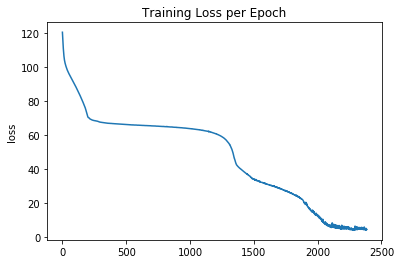

In [38]:
sns.lineplot(x=range(len(loss)),y=loss["loss"])
plt.title("Training Loss per Epoch");
print(model.summary())

In [39]:
training_score = model.evaluate(X_train,y_train,verbose=0)
val_score = model.evaluate(X_val,y_val,verbose=0)

In [40]:
val_score

[6.202270984649658, 6.202271]

In [41]:
training_score

[4.338141441345215, 4.3381414]

In [42]:
test_predictions = model.predict(X_val)

In [43]:
pred_df = pd.DataFrame(y_val)
pred_df.columns = ['Ra','Fn','Pw']
pred_df

,Ra,Fn,Pw
0,0.60,71.6,359.0
1,0.83,28.4,149.0
2,0.87,37.5,165.0
3,0.57,32.4,108.0
4,0.88,65.3,314.0
5,0.86,30.5,168.0
6,0.90,100.3,584.0
7,0.70,114.5,643.0
8,0.79,27.7,105.0
9,0.89,38.5,179.0


In [44]:
test_predictions = pd.DataFrame(test_predictions)

In [45]:
 pred_df

,Ra,Fn,Pw
0,0.60,71.6,359.0
1,0.83,28.4,149.0
2,0.87,37.5,165.0
3,0.57,32.4,108.0
4,0.88,65.3,314.0
5,0.86,30.5,168.0
6,0.90,100.3,584.0
7,0.70,114.5,643.0
8,0.79,27.7,105.0
9,0.89,38.5,179.0


In [46]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [47]:
pred_df["Ra"].values.size

12

In [48]:
pred_df.columns = ['Ra','Fn','Pw','Predicted Ra','Predicted Fn','Predicted Pw']

In [49]:
pred_df['Error'] =abs( pred_df['Ra'] - pred_df['Predicted Ra'])/pred_df['Ra'] + abs(pred_df['Fn'] - pred_df['Predicted Fn'])/pred_df['Fn'] + abs(pred_df['Pw'] - pred_df['Predicted Pw'])/pred_df['Pw']
pred_df['Error'] = pred_df['Error']*100/3

In [50]:
pred_df

,Ra,Fn,Pw,Predicted Ra,Predicted Fn,Predicted Pw,Error
0,0.60,71.6,359.0,0.647803,77.721695,374.924500,6.984249
1,0.83,28.4,149.0,0.838506,27.447483,129.352661,5.854961
2,0.87,37.5,165.0,0.863156,35.482216,168.254822,2.713349
3,0.57,32.4,108.0,0.569545,22.742264,108.162567,10.012734
4,0.88,65.3,314.0,0.881220,65.440376,313.766449,0.142644
5,0.86,30.5,168.0,0.861573,34.966358,165.757172,5.387258
6,0.90,100.3,584.0,0.919699,96.775574,465.844116,8.644956
7,0.70,114.5,643.0,0.716610,101.543312,490.289581,12.479479
8,0.79,27.7,105.0,0.823266,22.479958,105.301140,7.780864
9,0.89,38.5,179.0,0.879764,40.896000,194.467010,5.338089


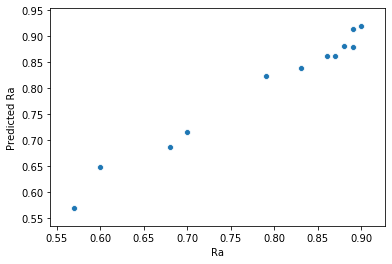

In [51]:
sns.scatterplot(x='Ra',y='Predicted Ra',data=pred_df)

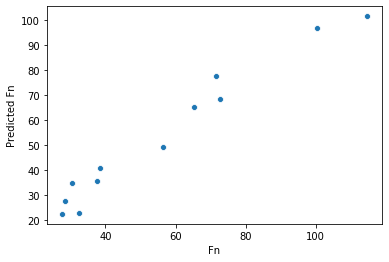

In [52]:
sns.scatterplot(x='Fn',y='Predicted Fn',data=pred_df)

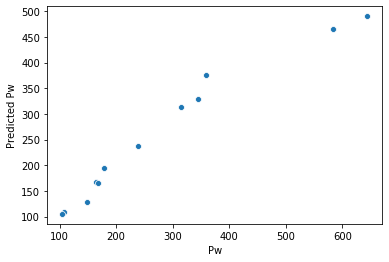

In [53]:
sns.scatterplot(x='Pw',y='Predicted Pw',data=pred_df)

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
print( mean_absolute_error(pred_df['Pw'],pred_df['Predicted Pw']))
print( mean_absolute_error(pred_df['Ra'],pred_df['Predicted Ra']))
print( mean_absolute_error(pred_df['Fn'],pred_df['Predicted Fn']))

28.76933224995931
0.014721722404162085
4.897252972920736


In [56]:
from tensorflow.keras.models import load_model

In [59]:
#model.save('grindingCompleteV215101055mape.h5')  # creates a HDF5 file 'my_model.h5'

In [60]:
#myModel = load_model('grindingComplete1010554.h5')
myModel = model

In [61]:
X_trainTree = df.drop(['Ra','Fn','Pw','RaI','FnI','PwI'],axis=1).iloc[::2]
X_testTree = df.drop(['Ra','Fn','Pw','RaI','FnI','PwI'],axis=1).iloc[1::2]
y_trainTree = df[['Ra','Fn','Pw']].iloc[::2].values
y_testTree = df[['Ra','Fn','Pw']].iloc[1::2].values

In [62]:

X_testTree = scaler.transform(X_testTree)
predictions = myModel.predict(X_testTree)

In [63]:
pred = pd.DataFrame(y_testTree)
pred.columns = ['Ra','Fn','Pw']

In [64]:
predictions = pd.DataFrame(predictions)

In [65]:
pred = pd.concat([pred,predictions],axis=1)

In [66]:
pred.columns = ['Ra','Fn','Pw','Predicted Ra','Predicted Fn','Predicted Pw']

In [67]:
pred['Error'] =abs( pred['Ra'] - pred['Predicted Ra'])/pred['Ra'] + abs(pred['Fn'] - pred['Predicted Fn'])/pred['Fn'] + abs(pred['Pw'] - pred['Predicted Pw'])/pred['Pw']
pred['Error'] = pred['Error']*100/3

In [68]:
pred

,Ra,Fn,Pw,Predicted Ra,Predicted Fn,Predicted Pw,Error
0,0.86,45.3,224.0,0.887632,43.460560,206.883987,4.971573
1,0.84,66.3,344.0,0.841789,68.573601,329.243378,2.643966
2,0.88,65.3,314.0,0.881220,65.440376,313.766449,0.142644
3,0.68,56.5,239.0,0.686111,49.355736,236.800018,4.821312
4,0.90,100.3,584.0,0.919699,96.775574,465.844116,8.644956
5,0.85,79.5,389.0,0.862774,77.834038,374.126495,2.473971
6,0.89,72.8,344.0,0.914337,68.630852,329.068054,4.267355
7,0.70,114.5,643.0,0.716610,101.543312,490.289581,12.479479
8,0.87,37.5,165.0,0.863156,35.482216,168.254822,2.713349
9,0.57,32.4,108.0,0.569545,22.742264,108.162567,10.012734


In [69]:
print(mean_absolute_error(pred['Ra'],pred['Predicted Ra']))
print(mean_absolute_error(pred['Fn'],pred['Predicted Fn']))
print(mean_absolute_error(pred['Pw'],pred['Predicted Pw']))

0.016000394374132157
4.650227689743042
24.857717990875244


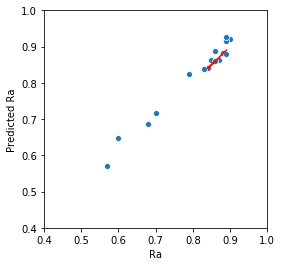

In [70]:
plt.figure(figsize=(4,4))
plt.xlim(0.4,1)
plt.ylim(0.4,1)

sns.scatterplot(x='Ra',y='Predicted Ra',data=pred)
plt.plot(y_test,y_test,'r')

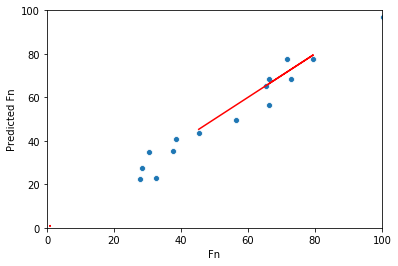

In [71]:
plt.xlim(0,100)
plt.ylim(0,100)
sns.scatterplot(x='Fn',y='Predicted Fn',data=pred)
plt.plot(y_test,y_test,'r')

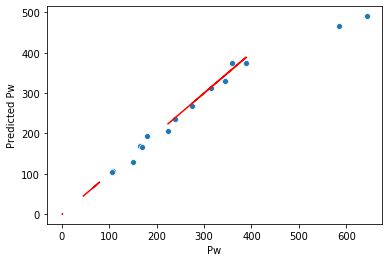

In [72]:
sns.scatterplot(x='Pw',y='Predicted Pw',data=pred)
plt.plot(y_test,y_test,'r')

In [63]:
new = [[0,80,50,2.9,1.47]]

In [64]:
new = scaler.transform(new)

In [65]:
myModel.predict(new)

array([[  0.86632323,  43.39112   , 207.15031   ]], dtype=float32)

In [72]:
X_trainTree = df.drop(['Ra','Fn','Pw','RaI','FnI','PwI'],axis=1).iloc[::2]
X_testTree = df.drop(['Ra','Fn','Pw','RaI','FnI','PwI'],axis=1).iloc[1::2]
y_trainTree = df[['Ra','Fn','Pw']].iloc[::2].values
y_testTree = df[['Ra','Fn','Pw']].iloc[1::2].values

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostRegressor
r2 = (tree.DecisionTreeRegressor(max_depth=4))
r2.fit(X_trainTree,y_trainTree)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [74]:
X_testTree

,B,m,c,Vw,d
1,0,80,50,2.9,1.47
3,0,180,50,2.9,2.59
5,0,80,100,2.9,2.59
7,0,180,100,2.9,1.47
9,0,80,50,6.9,2.59
11,0,180,50,6.9,1.47
13,0,80,100,6.9,1.47
15,0,180,100,6.9,2.59
17,1,80,50,2.9,2.59
19,1,180,50,2.9,1.47


In [75]:
predTree = pd.DataFrame(y_testTree)
predTree.columns = ['Ra','Fn','Pw']
predictions3 = r2.predict(X_testTree)
predictions3 = pd.DataFrame(predictions3)
#predTree['Prediction'] = predictions3
predTree = pd.concat([predTree,predictions3],axis=1)#predTree['Error'] = predTree['Y test'] - predTree['Predictions']
predTree.columns = ['Ra','Fn','Pw','Predicted Ra','Predicted Fn','Predicted Pw']
predTree['% Error'] =abs( predTree['Ra'] - predTree['Predicted Ra'])/predTree['Ra'] + abs(predTree['Fn'] - predTree['Predicted Fn'])/predTree['Fn'] + abs(predTree['Pw'] - predTree['Predicted Pw'])/predTree['Pw']
predTree['% Error'] = predTree['% Error']*100/3
predTree['mean Error'] =abs( predTree['Ra'] - predTree['Predicted Ra']) + abs(predTree['Fn'] - predTree['Predicted Fn']) + abs(predTree['Pw'] - predTree['Predicted Pw'])
predTree['mean Error'] = predTree['mean Error']/3

predTree

,Ra,Fn,Pw,Predicted Ra,Predicted Fn,Predicted Pw,% Error,mean Error
0,0.86,45.3,224.0,0.88,43.4,209.0,4.405423,5.640000
1,0.84,66.3,344.0,0.83,66.2,329.0,1.900590,5.036667
2,0.88,65.3,314.0,0.86,64.2,314.0,1.319087,0.373333
3,0.68,56.5,239.0,0.67,55.5,224.0,3.172217,5.336667
4,0.90,100.3,584.0,0.91,95.6,599.0,2.788515,6.570000
5,0.85,79.5,389.0,0.85,74.9,374.0,3.214068,6.533333
6,0.89,72.8,344.0,0.89,68.6,329.0,3.376565,6.400000
7,0.70,114.5,643.0,0.71,109.6,658.0,2.680287,6.636667
8,0.87,37.5,165.0,0.87,36.8,150.0,3.652525,5.233333
9,0.57,32.4,108.0,0.57,30.5,108.0,1.954733,0.633333


In [76]:
#mean_absolute_error(predTree['Y test'],predTree['Predictions'])

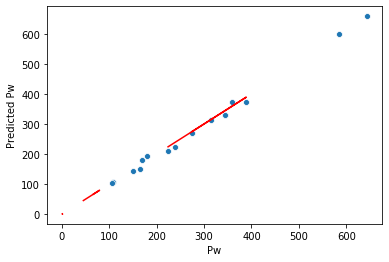

In [77]:
sns.scatterplot(x='Pw',y='Predicted Pw',data=predTree)
plt.plot(y_test,y_test,'r')

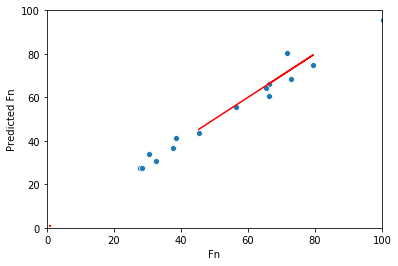

In [78]:
plt.xlim(0,100)
plt.ylim(0,100)
sns.scatterplot(x='Fn',y='Predicted Fn',data=predTree)
plt.plot(y_test,y_test,'r')

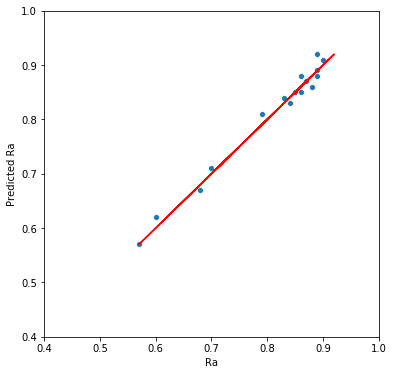

In [79]:
plt.figure(figsize=(6,6))
plt.xlim(0.4,1)
plt.ylim(0.4,1)

sns.scatterplot(x='Ra',y='Predicted Ra',data=predTree)
plt.plot(y_train,y_train,'r')

In [1421]:
type(X_testTree.iloc[0])

pandas.core.series.Series

In [90]:
#fig = plt.figure(figsize=(30,30))
#_ = tree.plot_tree(r2,max_depth=4,feature_names=["B","m","c","Vw","d"],)

In [1422]:
l = np.linspace(12,16,8)

In [1423]:
type(l)

numpy.ndarray

In [1506]:
Vw_range = np.linspace(2.9,6.9,24)
d_range = np.linspace(1.47,2.6,24)
B = np.array([0,1])
m = np.array([80,100,120,140,160,180])
c = np.array([50,75,100])
             

In [1507]:
import itertools

In [1508]:
a = [B,m,c,Vw_range,d_range,]
combinations = list(itertools.product(*a))

In [1509]:
combinations = np.array(combinations)

In [1510]:
combinations.shape

(20736, 5)

In [1511]:
inputOptimize = pd.DataFrame(combinations,columns=["B","m","c","Vw","d",])

In [1512]:
inputOptimize.head

<bound method NDFrame.head of          B      m      c   Vw         d
0      0.0   80.0   50.0  2.9  1.470000
1      0.0   80.0   50.0  2.9  1.519130
2      0.0   80.0   50.0  2.9  1.568261
3      0.0   80.0   50.0  2.9  1.617391
4      0.0   80.0   50.0  2.9  1.666522
...    ...    ...    ...  ...       ...
20731  1.0  180.0  100.0  6.9  2.403478
20732  1.0  180.0  100.0  6.9  2.452609
20733  1.0  180.0  100.0  6.9  2.501739
20734  1.0  180.0  100.0  6.9  2.550870
20735  1.0  180.0  100.0  6.9  2.600000

[20736 rows x 5 columns]>

In [1513]:
inputOptimize

,B,m,c,Vw,d
0,0.0,80.0,50.0,2.9,1.470000
1,0.0,80.0,50.0,2.9,1.519130
2,0.0,80.0,50.0,2.9,1.568261
3,0.0,80.0,50.0,2.9,1.617391
4,0.0,80.0,50.0,2.9,1.666522
...,...,...,...,...,...
20731,1.0,180.0,100.0,6.9,2.403478
20732,1.0,180.0,100.0,6.9,2.452609
20733,1.0,180.0,100.0,6.9,2.501739
20734,1.0,180.0,100.0,6.9,2.550870


In [1514]:
#customPredictions = model.predict(scaler.transform(inputOptimize))
customPredictions = myModel.predict((scaler.transform(inputOptimize)))

In [1515]:
(customPredictions)

array([[  0.88560545,  44.68406   , 208.9402    ],
       [  0.88580126,  45.546432  , 213.017     ],
       [  0.8859961 ,  46.40879   , 217.09375   ],
       ...,
       [  0.78647596,  56.59176   , 264.89313   ],
       [  0.7832822 ,  57.5498    , 269.40558   ],
       [  0.780087  ,  58.507847  , 273.91803   ]], dtype=float32)

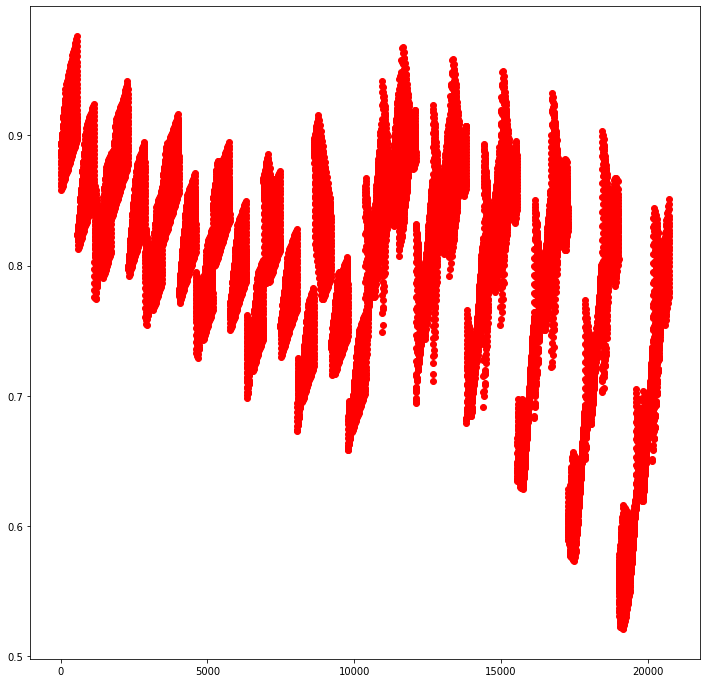

In [1516]:
plt.figure(figsize=(12,12))
plt.plot(customPredictions[:,0] , "ro")

In [1517]:
customOutput = pd.DataFrame(customPredictions,columns=["Ra","Fn","Pw"])

In [1518]:
customOutput["Vw"] = inputOptimize["Vw"]

In [1519]:
customOutput

,Ra,Fn,Pw,Vw
0,0.885605,44.684059,208.940201,2.9
1,0.885801,45.546432,213.016998,2.9
2,0.885996,46.408791,217.093750,2.9
3,0.886191,47.271160,221.170532,2.9
4,0.886385,48.133530,225.247299,2.9
...,...,...,...,...
20731,0.792865,54.675674,255.868225,6.9
20732,0.789668,55.633724,260.380707,6.9
20733,0.786476,56.591759,264.893127,6.9
20734,0.783282,57.549801,269.405579,6.9


In [1520]:
customOutput["MRR"] = inputOptimize["d"]*inputOptimize["Vw"]

In [1521]:
customOutput = customOutput.drop("Vw",axis=1)

In [1522]:
customOutput

,Ra,Fn,Pw,MRR
0,0.885605,44.684059,208.940201,4.263000
1,0.885801,45.546432,213.016998,4.405478
2,0.885996,46.408791,217.093750,4.547957
3,0.886191,47.271160,221.170532,4.690435
4,0.886385,48.133530,225.247299,4.832913
...,...,...,...,...
20731,0.792865,54.675674,255.868225,16.584000
20732,0.789668,55.633724,260.380707,16.923000
20733,0.786476,56.591759,264.893127,17.262000
20734,0.783282,57.549801,269.405579,17.601000


In [1523]:
completeOptimizationTable = pd.concat([inputOptimize,customOutput],axis = 1)

In [1524]:
completeOptimizationTable

,B,m,c,Vw,d,Ra,Fn,Pw,MRR
0,0.0,80.0,50.0,2.9,1.470000,0.885605,44.684059,208.940201,4.263000
1,0.0,80.0,50.0,2.9,1.519130,0.885801,45.546432,213.016998,4.405478
2,0.0,80.0,50.0,2.9,1.568261,0.885996,46.408791,217.093750,4.547957
3,0.0,80.0,50.0,2.9,1.617391,0.886191,47.271160,221.170532,4.690435
4,0.0,80.0,50.0,2.9,1.666522,0.886385,48.133530,225.247299,4.832913
...,...,...,...,...,...,...,...,...,...
20731,1.0,180.0,100.0,6.9,2.403478,0.792865,54.675674,255.868225,16.584000
20732,1.0,180.0,100.0,6.9,2.452609,0.789668,55.633724,260.380707,16.923000
20733,1.0,180.0,100.0,6.9,2.501739,0.786476,56.591759,264.893127,17.262000
20734,1.0,180.0,100.0,6.9,2.550870,0.783282,57.549801,269.405579,17.601000


In [1525]:
d_range

array([1.47      , 1.51913043, 1.56826087, 1.6173913 , 1.66652174,
       1.71565217, 1.76478261, 1.81391304, 1.86304348, 1.91217391,
       1.96130435, 2.01043478, 2.05956522, 2.10869565, 2.15782609,
       2.20695652, 2.25608696, 2.30521739, 2.35434783, 2.40347826,
       2.4526087 , 2.50173913, 2.55086957, 2.6       ])

In [1526]:
completeOptimizationTable["F"] = -1*completeOptimizationTable["MRR"]+3*completeOptimizationTable["Ra"]+6*completeOptimizationTable["Fn"]+6*completeOptimizationTable["Pw"]

In [1527]:
completeOptimizationTable["F"].idxmin()

12096

In [1528]:
result = (completeOptimizationTable.iloc[completeOptimizationTable["F"].idxmin()])

In [1529]:
researchPaperF = 1172.76
result

B        1.000000
m      100.000000
c       50.000000
Vw       2.900000
d        1.470000
Ra       0.694278
Fn      18.879021
Pw      86.314484
MRR      4.263000
F      628.980859
Name: 12096, dtype: float64

In [1530]:
comparision = pd.DataFrame(data=result.values,index=["B","m","c","Vw","d","Ra","Fn","Pw","MRR","F"],columns=["My result"])

In [1531]:
comparision

,My result
B,1.000000
m,100.000000
c,50.000000
Vw,2.900000
d,1.470000
Ra,0.694278
Fn,18.879021
Pw,86.314484
MRR,4.263000
F,628.980859


In [1532]:
comparision["Research paper results"] = np.array([1,180,50,6.9,1.6,0.81,31.9,166,11.04,1172.76])

In [1533]:
comparision.round(2)

,My result,Research paper results
B,1.00,1.00
m,100.00,180.00
c,50.00,50.00
Vw,2.90,6.90
d,1.47,1.60
Ra,0.69,0.81
Fn,18.88,31.90
Pw,86.31,166.00
MRR,4.26,11.04
F,628.98,1172.76


In [1534]:
completeOptimizationTable[(completeOptimizationTable["MRR"]>10) & (completeOptimizationTable["MRR"]<12) & (completeOptimizationTable["B"]==1) & (completeOptimizationTable["m"]==180) & (completeOptimizationTable["c"]==50)]

,B,m,c,Vw,d,Ra,Fn,Pw,MRR,F
19174,1.0,180.0,50.0,3.943478,2.550870,0.522787,45.992844,213.605560,10.059299,1549.099424
19175,1.0,180.0,50.0,3.943478,2.600000,0.520887,46.925629,218.002502,10.253043,1580.878404
19196,1.0,180.0,50.0,4.117391,2.452609,0.529740,45.320839,210.466385,10.098350,1526.214259
19197,1.0,180.0,50.0,4.117391,2.501739,0.527840,46.253628,214.863327,10.300639,1557.984572
19198,1.0,180.0,50.0,4.117391,2.550870,0.525941,47.186417,219.260269,10.502928,1589.755040
...,...,...,...,...,...,...,...,...,...,...
19561,1.0,180.0,50.0,6.900000,1.519130,0.616309,46.695126,217.400330,10.482000,1575.939652
19562,1.0,180.0,50.0,6.900000,1.568261,0.614411,47.627907,221.797272,10.821000,1607.573379
19563,1.0,180.0,50.0,6.900000,1.617391,0.612512,48.560703,226.194229,11.160000,1639.207168
19564,1.0,180.0,50.0,6.900000,1.666522,0.610611,49.493488,230.591171,11.499000,1670.840768
